In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#5.2.3
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#5.2.4
#get the ccolumns and the rows that are not null
#this is counting all the data in the df, showing that they are all 120, so no NaN
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
#done this before, looking for all the ones that are null and counting/summing them 
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# get the unique values for the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#get the number of data points for the urban cities
sum(city_data_df['type']=="Urban")

66

In [10]:
#get the number of data points for the rural cities
sum(city_data_df['type']=="Rural")

18

In [11]:
#get the number for suburban
sum(city_data_df['type']=="Suburban")

36

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset
#merge these two df together, using the city as the common column
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#5.3.1
#creating individual df based on types of cities (urban in this case)
urban_cities_df= pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#create the df for the other types of cities
suburban_cities_df= pyber_data_df[pyber_data_df["type"]== "Suburban"]
rural_cities_df= pyber_data_df[pyber_data_df["type"]== "Rural"]

In [18]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
#5.3.2
#getting the number of rides for each city type
#getting the count of rides per city in urban df using group by in the city column and then count buy ride id
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
#getting the suburban and rural ride counts, following the formula above
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [21]:
#5.3.3
#getting the average fare for each city type
urban_avg_fare= urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
#doing the same for rural and sub
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [23]:
#5.3.4
#getting the average number of driversd for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
#getting the average drivers from sub and rur
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

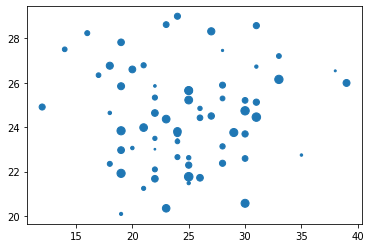

In [25]:
#5.3.5 creating bubble charts
#build the scatter plots for urban cities
#sets the size (s=) to the driver count, mor dirvers, bigger dot
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=urban_driver_count)

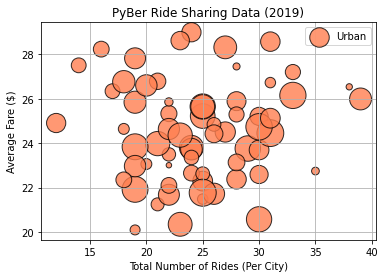

In [26]:
# formatting more, adding lables, playing with size, color so on
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            #multiplying the size of the dots by 10 so we can see them better, c= color = coral
           s=10*urban_driver_count, c="coral",
           #making the edge color black, the linewidth of the edge 1
           edgecolor='black', linewidths=1, 
           #alpha of 80% making it slightly tansparent, 
           alpha=.8, label='Urban')
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
#adding a grid
plt.grid(True)
plt.legend()

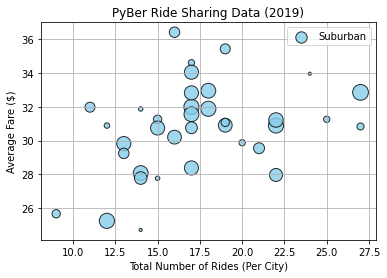

In [27]:
# creating the suburban bubble chart, changing urban to suburban, changing the color to sky blue but leaving most stuff alone
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Suburban')
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

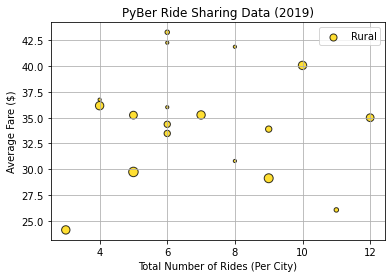

In [28]:
#creating the rural bubble plot, suburban to rural and color to gold
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Rural')
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

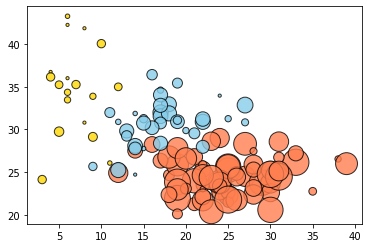

In [29]:
#5.3.6
#combine the plots above into one chart
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor='black', linewidths=1, 
           alpha=.8, label='Urban')
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Suburban')
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Rural')
plt.show()

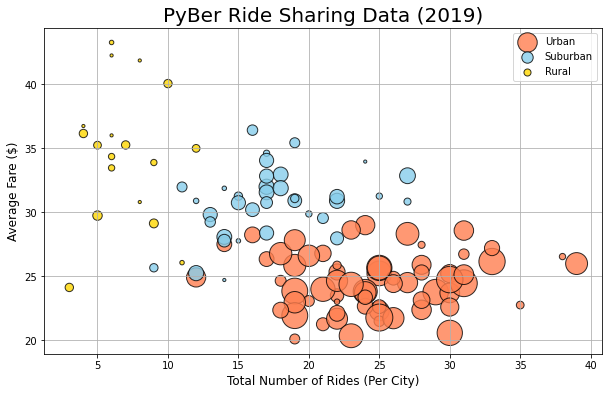

In [30]:
#adding some asthetic stuff, font size, legend, grid, figsize which increases the size of the graph so it is easier to read
# the fig size incresases the edges of the graph to make it larger, default is (6.4, 4.8)
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor='black', linewidths=1, 
           alpha=.8, label='Urban')
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Suburban')
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Rural')
#fontsize changes the font...duh
plt.title("PyBer Ride Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

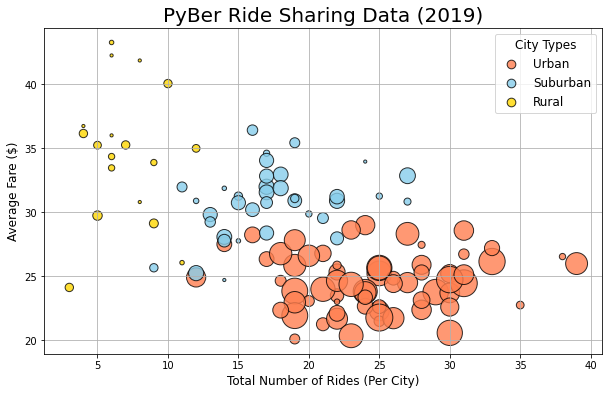

In [31]:
#modifying the legend so the markers are the same size, see line 23
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor='black', linewidths=1, 
           alpha=.8, label='Urban')
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Suburban')
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Rural')
plt.title("PyBer Ride Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
#changing the font size (12), expanding the size of the legend to best fit everything, so its not crammed together
#sets the scatterpoints to 1 (just shows one dot, can change it to any number), 
#loc "best" is telling it to place the legend in the "best" place (overlapping the least amount of points)
#adds a title to the legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
#this sets the size of the markers, uses an index method 0 1 2 for the location
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.show()

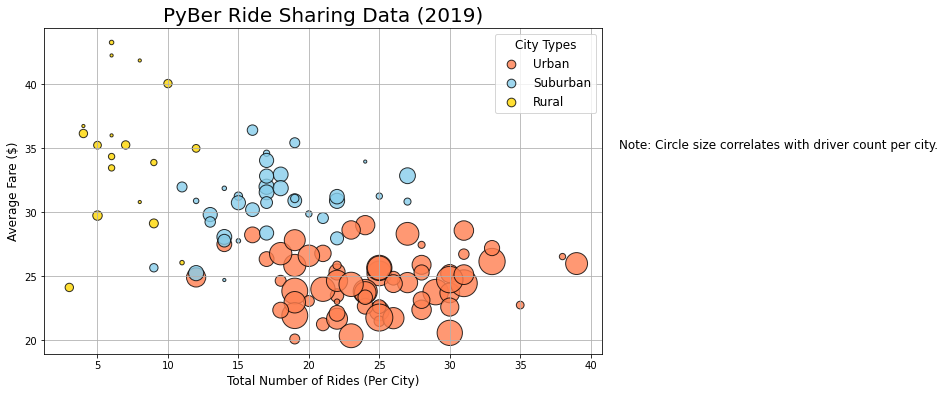

In [32]:
# Incorporate a text label about circle size.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor='black', linewidths=1, 
           alpha=.8, label='Urban')
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Suburban')
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Rural')
plt.title("PyBer Ride Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# adds the note on the right side, set by the coordinates in the (x,y), 42 sets it outside of the graph
# you can put it inside the graph if you choose, by changing the x
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.show()

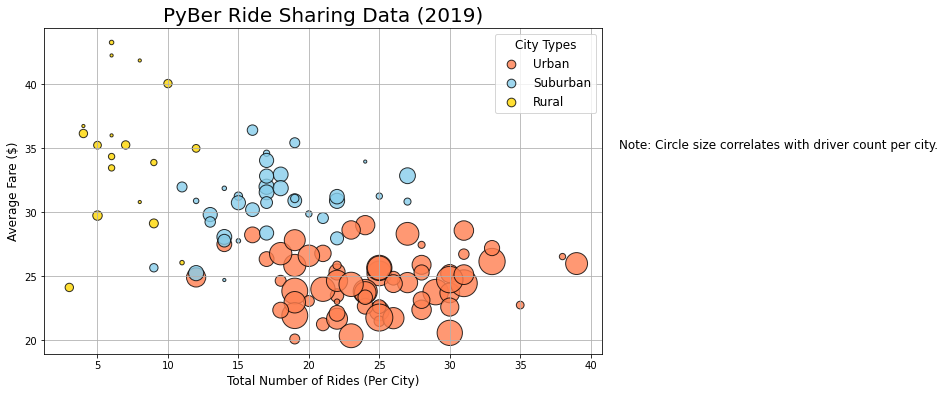

In [33]:
#save the figure into a folder,(make sure the folder exists before you try to save it, or it will error out)
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor='black', linewidths=1, 
           alpha=.8, label='Urban')
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Suburban')
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor='black', linewidths=1,
           alpha=.8, label='Rural')
plt.title("PyBer Ride Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
#will save the figure as fig 1, as a png, in the analysis folder
plt.savefig("analysis/Fig1.png")
plt.show()

In [34]:
#5.4.1
#summary statistics for number of rides by city type
#lots of ways to skin a cat. 
#.describe() 
# pandas mean() median() and mode() methods on a series
# numpy mean() median() functions, and scipy stats mode() function on a series
# Get summary statistics for cities
#the .describe() function give the whole shebang, count mean standard dif min quartiles and max
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [35]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [36]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [37]:
# Get summary statistics for ride counts
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [38]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [39]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [40]:
#pandas mean () median() and mode()
# Calculate the mean of the ride count for each city type.
# get the mean of each series, and rounds it to 2 decimal points
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [41]:
#finding the median using pandas
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [42]:
# Calculate the mode of the ride count for the urban cities.
#remember data sets can have more than one mode or none (just the number that shows up the most frequently)
#urban is 22 AND 25, suburban is 17 and rural 6
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [43]:
# numpy mean median mode
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [44]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

#the using the sts.mode will give us the mode (22) AND the number of times it shows up (7)! handy!!
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [45]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [46]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [47]:
#5.4.2
#summary statistics for the fare by city type
# get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [48]:
#calculate the measueres of central tendency (mean median mode) for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"the mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"the median fare price for urban trips is ${median_urban_fares:.2f}.")
      
mode_urban_fares = sts.mode(urban_fares)
print(f"the mode fare price for urban trips is ${mode_urban_fares}.")

the mean fare price for urban trips is $24.53.
the median fare price for urban trips is $24.64.
the mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [49]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [50]:
#calculate the measueres of central tendency (mean median mode) for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"the mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"the median fare price for suburban trips is ${median_suburban_fares:.2f}.")
      
mode_suburban_fares = sts.mode(suburban_fares)
print(f"the mode fare price for suburban trips is ${mode_suburban_fares}.")

the mean fare price for suburban trips is $30.97.
the median fare price for suburban trips is $30.75.
the mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [51]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [52]:
#calculate the measueres of central tendency (mean median mode) for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"the mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"the median fare price for rural trips is ${median_rural_fares:.2f}.")
      
mode_rural_fares = sts.mode(rural_fares)
print(f"the mode fare price for rural trips is ${mode_rural_fares}.")

the mean fare price for rural trips is $34.62.
the median fare price for rural trips is $37.05.
the mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [53]:
#5.4.3
#summary statistics for number of drivers by city type
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [54]:
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [55]:
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [56]:
#calculate the measueres of central tendency (mean median mode) for the average driver count for urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"the mean driver count for urban cities is {round(mean_urban_drivers)}.")

median_urban_drivers = np.median(urban_drivers)
print(f"the median driver count for urban cities is {round(median_urban_drivers)}.")
      
mode_urban_drivers = sts.mode(urban_drivers)
print(f"the mode driver count for urban cities is {mode_urban_drivers}.")

the mean driver count for urban cities is 37.
the median driver count for urban cities is 37.
the mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [57]:
#calculate the measueres of central tendency (mean median mode) for the average driver count for suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"the mean driver count for suburban cities is {round(mean_suburban_drivers)}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"the median driver count for suburban cities is {round(median_suburban_drivers)}.")
      
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"the mode driver count for suburban cities is {mode_suburban_drivers}.")

the mean driver count for suburban cities is 14.
the median driver count for suburban cities is 16.
the mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [58]:
#calculate the measueres of central tendency (mean median mode) for the average driver count for rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"the mean driver count for rural cities is {round(mean_rural_drivers)}.")

median_rural_drivers = np.median(rural_drivers)
print(f"the median driver count for rural cities is {round(median_rural_drivers)}.")
      
mode_rural_drivers = sts.mode(rural_drivers)
print(f"the mode driver count for rural cities is {mode_rural_drivers}.")

the mean driver count for rural cities is 4.
the median driver count for rural cities is 4.
the mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


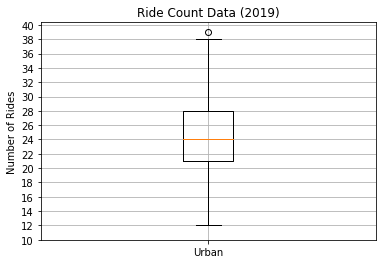

In [59]:
# 5.4.4
# box and whisker plots
# Create a box-and-whisker plot for the urban cities ride count.
#it REQUIRES the ax.boxplot()
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

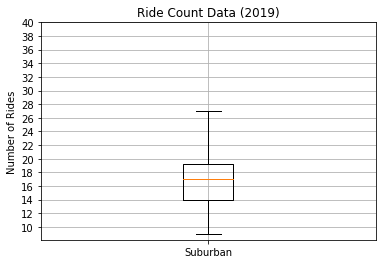

In [60]:
#box and whisker plot for suburban
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

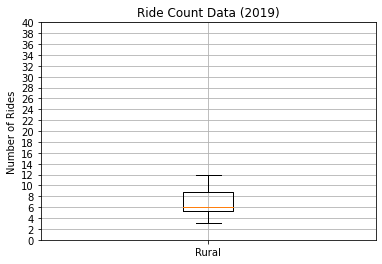

In [61]:
#box and chisker plot for rural 
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 41, step=2.0))
ax.grid()
plt.show()

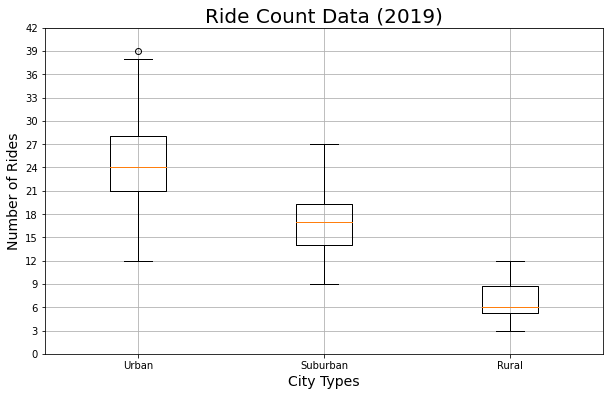

In [62]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [63]:
#find the largest city, since there is only one outlier on this graph (39), the largest city has to be that one outlier
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


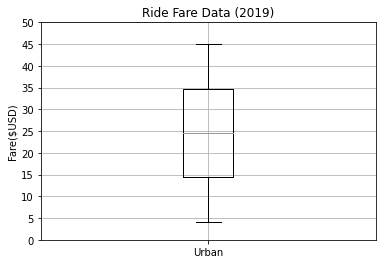

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [64]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

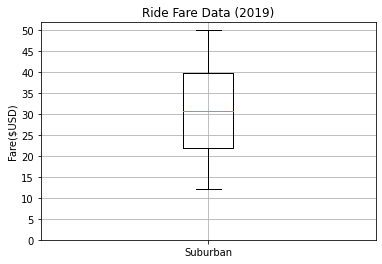

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [65]:
# b&w for suburban fare
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

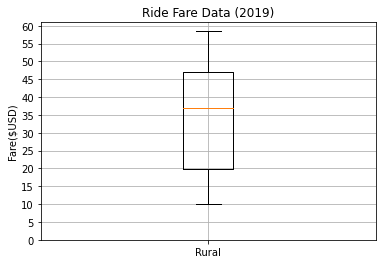

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [66]:
# b&w for rural fare
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

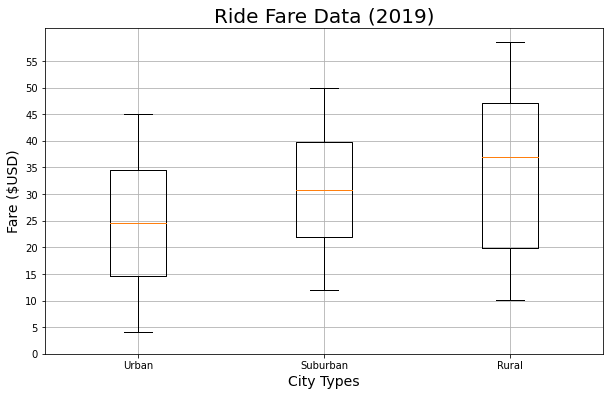

In [67]:
# Add all ride fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

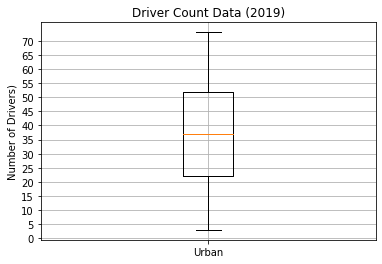

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [68]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

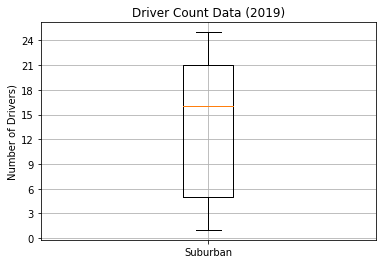

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [69]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 25, step=3.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

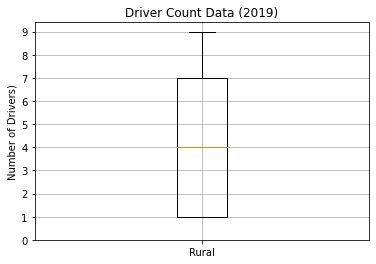

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [70]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

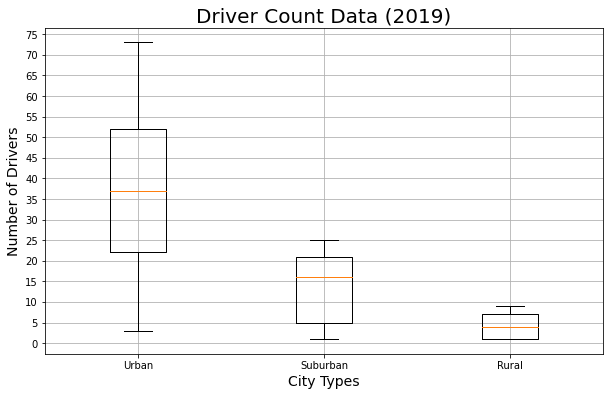

In [71]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [72]:
#5.5.1 
# percentages of fares for each city type
# Get the sum of the fares for each city type. looking the the pyber df, grouping by type (of city)
# and summing them
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [73]:
# Get the sum of all the fares.
# for calculating percentages
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [74]:
# Calculate the percentage of fare for each city type.
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

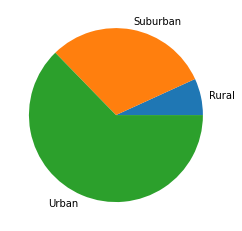

In [75]:
#5.5.2
# plot the type percentages as a pie graph, with labels
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show

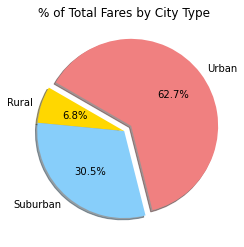

In [76]:
#formatting the pie chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

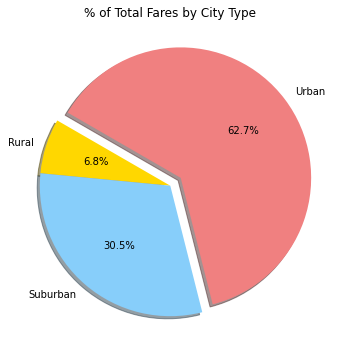

In [77]:
# Import mpl to change the plot configurations using rcParams.
#this is not the same as matplotlib.pyplot
import matplotlib as mpl
# Build Pie Chart
#this is increasing the size of the graph to make it easier to read
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
# there isn't a way to change the font size for a pie using pyplot so we have to use the 
# mpl.rcParams (changing the default paramaters for pie)
#also, 14 seems no bigger than the ones that were already there, 18 seems alot easier to read
mpl.rcParams['font.size'] = 18
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [78]:
#5.6.1
#calculate ride percentages
#Get the total number of rides for each city type. .groupby(["type"]).count()["ride_id"]
#Get the total rides for all the city types. pyber_data_df["ride_id"]
#Calculate the percentage of the total rides for each city type.
ride_percents = pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count() * 100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

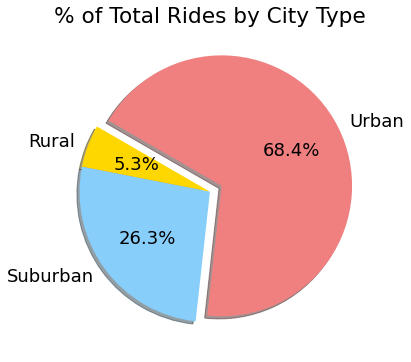

In [79]:
#5.6.2
# making the pie chart for ride percentages
# refactor the code for the fares pie chart above

import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 18
plt.savefig("analysis/Fig6.png")
plt.show()

In [80]:
#5.7.1 calculating driver percentages
# basically doing the same thing as the step above, but driver counts
# why do we use the city data df instead of the pyber data df? it skews the data quite a but, but why?
# since its a merged data set, shouldn't it be the same?
driver_percents = city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum() * 100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

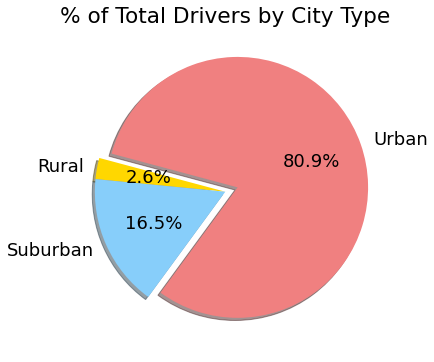

In [81]:
#5.7.2 refactor the code for the new pie chart
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 18
#plt.savefig("analysis/Fig7.png")
plt.show()